# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.special import erf

# Create model

In [2]:
def indyk(a,b):
    if a>b:
        x = 1
    else:
        x = 0
    return x

In [3]:
def model_i_binom(r,c,N):
    x1 = int(np.floor(r*(N-1))+1)
    
    f1 = 1-binom.cdf(x1, N-1, c)
    f2 = 1-binom.cdf(x1, N-1, 1-c)
    return (c*f2-(1-c)*f1)/(1/2-c-(1-c)*f1+c*f2)

def model_i_indyk(r,c):
    f1 = indyk(c,r)
    f2 = indyk(1-c,r)
    return (c*f2-(1-c)*f1)/(1/2-c-(1-c)*f1+c*f2)

def model_normal(r,c,N):
    f1 = 1/2 - 1/2*erf((np.sqrt(N)*(r-c))/(np.sqrt(2*(1-c)*c)))
    f2 = 1/2 - 1/2*erf((np.sqrt(N)*(r-1+c))/(np.sqrt(2*(1-c)*c)))
    return (c*f2-(1-c)*f1)/(1/2-c-(1-c)*f1+c*f2)

# Plots

<ipython-input-3-15c0cf2959c5>:14: RuntimeWarning: divide by zero encountered in double_scalars
  f1 = 1/2 - 1/2*erf((np.sqrt(N)*(r-c))/(np.sqrt(2*(1-c)*c)))
<ipython-input-3-15c0cf2959c5>:15: RuntimeWarning: divide by zero encountered in double_scalars
  f2 = 1/2 - 1/2*erf((np.sqrt(N)*(r-1+c))/(np.sqrt(2*(1-c)*c)))


(-0.1, 1.0)

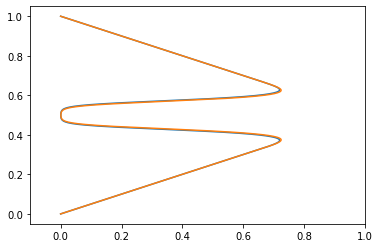

In [4]:
N = 500

res = []
for i in np.linspace(0,1,1000):
    res.append(model_i_binom(0.6,i,N))

res2 = []
for i in np.linspace(0,1,1000):
    res2.append(model_normal(0.6,i,N))

# plt.plot(res,list(np.linspace(0,1,1000)),".")
plt.plot(res,list(np.linspace(0,1,1000)),"-")
plt.plot(res2,list(np.linspace(0,1,1000)),"-")
plt.xlim(-0.1,1)

# Save data to files

In [10]:
plik = open('a_binom_N_{}.txt'.format(N),'w')
for i in zip(res2,np.linspace(0,1,1000)):
    plik.write(str(i[0]) + ' ' + str(i[1]) + '\n')
plik.close()

plik = open('a_normal_N_{}.txt'.format(N),'w')
for i in zip(res3,np.linspace(0,1,1000)):
    plik.write(str(i[0]) + ' ' + str(i[1]) + '\n')
plik.close()